# Transmitted field at exit
- structure (no mountings) excited at one end
- field transmitted through waveguide 
- field detected at exit onf wvg on axis
- resolution of the simulation: $res=18$  
  $\Delta t=1/(18*2)=0.0277$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from scipy.fftpack import fft, ifft
# import peakutils  # finding peaks by convolution

%matplotlib notebook

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.formatter.use_mathtext'] = True
mpl.rcParams['axes.formatter.limits']= (-3,3)
mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'
#

# Group delay and Phase delay
https://en.wikipedia.org/wiki/Group_delay_and_phase_delay

# Large source
- df=0.1
- f=0.52

In [3]:
input_field=h5py.File("/gpfs/data/kellermeier_m/MEEP/transmitted-field-at-point-large-src/transmitted-field--r-0.38-cells-8-l-40-f-0.52-df-0.1-res-18/ez-source.h5")
# input_field=h5py.File("Simulation-results/MEEP/transmitted-field-at-point/transmitted-field--r-0.38-cells-8-lcells-2-src-out-res-18/ez-source.h5")
# output_field=h5py.File("Simulation-results/MEEP/transmitted-field-at-point/ez-at-exit-on-axis.h5")
output_field=h5py.File("/gpfs/data/kellermeier_m/MEEP/transmitted-field-at-point-large-src/transmitted-field--r-0.38-cells-8-l-40-f-0.52-df-0.1-res-18/ez-at-exit-on-axis.h5")
res=18
dt=1/(2*res)
t_len=output_field.get("ez").shape[0]
# frequency domain
input_f_comp=fft(input_field.get("ez")[:t_len],n=t_len)
output_f_comp=fft(output_field.get("ez")[:t_len], n=t_len)
f=np.linspace(0, 1/(2*dt), t_len//2)
# transfer function
H_f=output_f_comp/input_f_comp

<IPython.core.display.Javascript object>


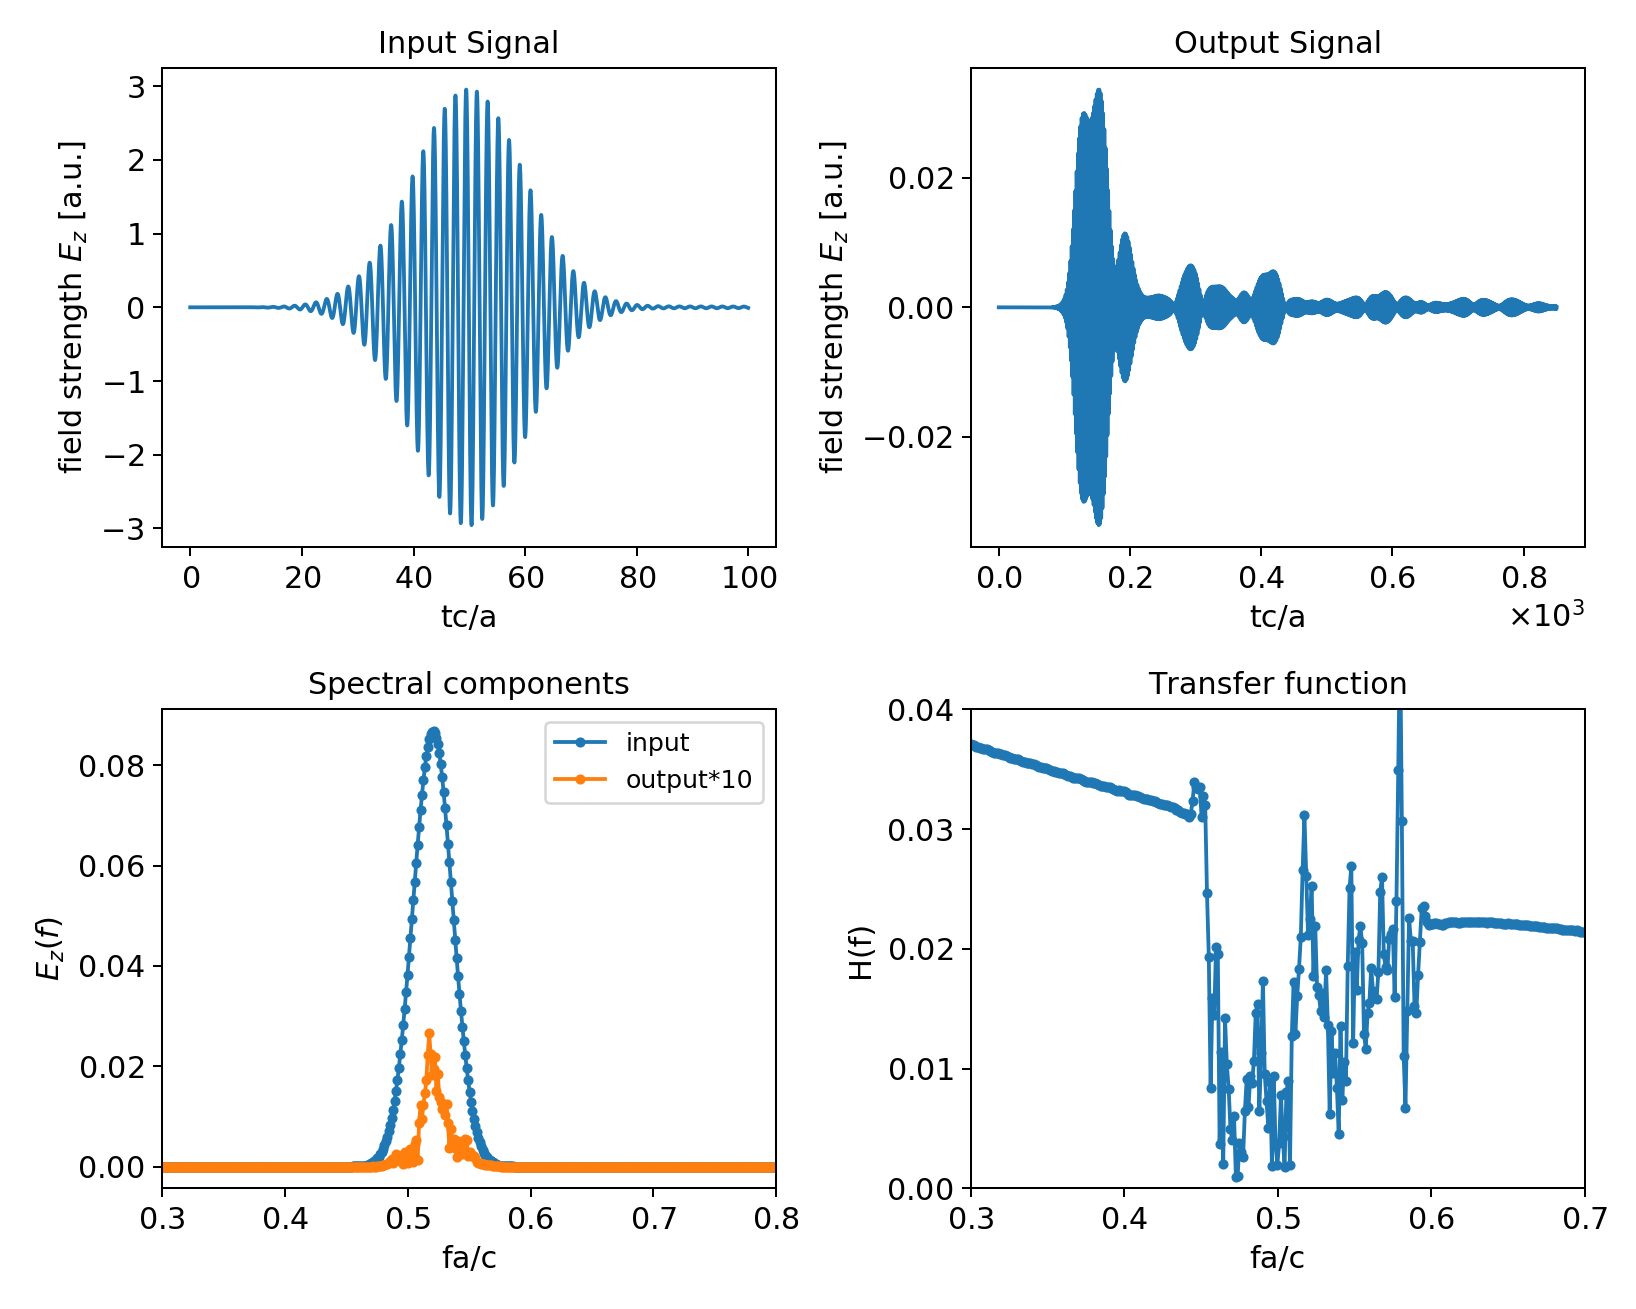

In [4]:
fig=plt.figure(figsize=plt.figaspect(0.8)*1.5)
ax=fig.add_subplot(221)
ax.set_xlabel("tc/a")
ax.set_ylabel("field strength $E_z$ [a.u.]")

t_data= np.arange(0, t_len)*dt
ax.plot(t_data[:input_field.get("ez").shape[0] ], input_field.get("ez"))
# ax.plot(t_data, input_field[:t_len])

ax.set_title("Input Signal")

ax2=fig.add_subplot(222)
ax2.set_xlabel("tc/a")
ax2.set_ylabel("field strength $E_z$ [a.u.]")

t_data= np.arange(0, t_len)*dt
ax2.plot(t_data, output_field.get("ez")[:t_len])

ax2.set_title("Output Signal")

# fourier transformed signals
ax3=fig.add_subplot(223)
ax3.plot(f,2/t_len* np.abs(input_f_comp[0:t_len//2]), marker=".", label="input" )
ax3.plot(f,2/t_len* 10*np.abs(output_f_comp[0:t_len//2]), marker=".", label="output*10" )
ax3.set_xlabel("fa/c")
ax3.set_ylabel("$E_z(f)$")
ax3.legend()
ax3.set_xlim((0.3,0.8))
ax3.set_title("Spectral components")

# transfer function
ax4=fig.add_subplot(224)
ax4.plot(f,np.abs(H_f[0:t_len//2]), marker=".")
ax4.set_xlabel("fa/c")
ax4.set_ylabel("H(f)")
ax4.set_xlim((0.3,0.7))
ax4.set_ylim(0,0.04)
ax4.set_title("Transfer function")

fig.tight_layout()

<IPython.core.display.Javascript object>


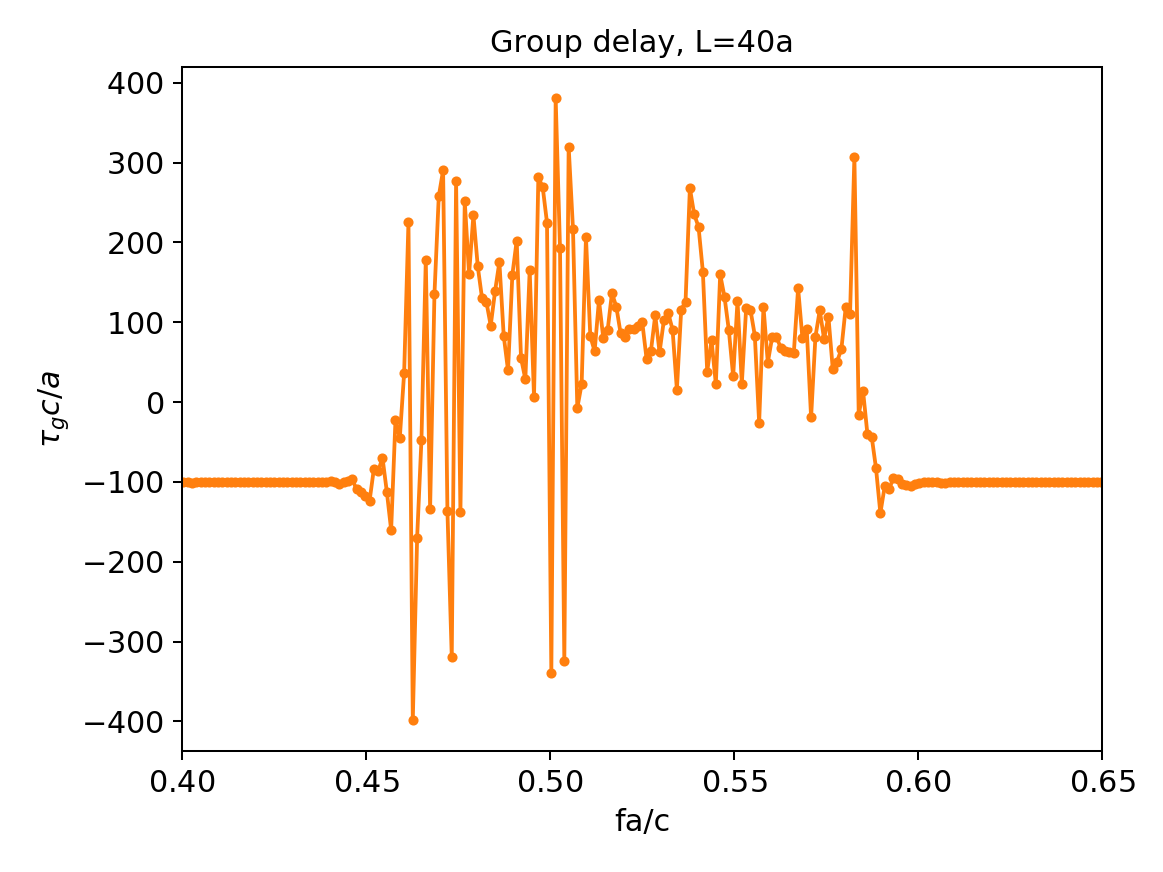

In [8]:
# phase of transfer function
phi=np.angle(H_f)
fig=plt.figure()
ax2=fig.add_subplot(111)
ax2.set_xlabel("fa/c")
ax2.plot(
    (f[:-1]+f[1:])/2,
    -np.diff(np.unwrap(phi[0:t_len//2]))/np.diff(f)*1/(2*np.pi),
    marker=".", color="C1", label=r"$\tau_g$"
)
ax2.set_ylabel(r"$\tau_g c/a$")
ax2.set_xlim((0.4,0.65))
ax2.set_title("Group delay, L=40a")
fig.tight_layout()

<IPython.core.display.Javascript object>


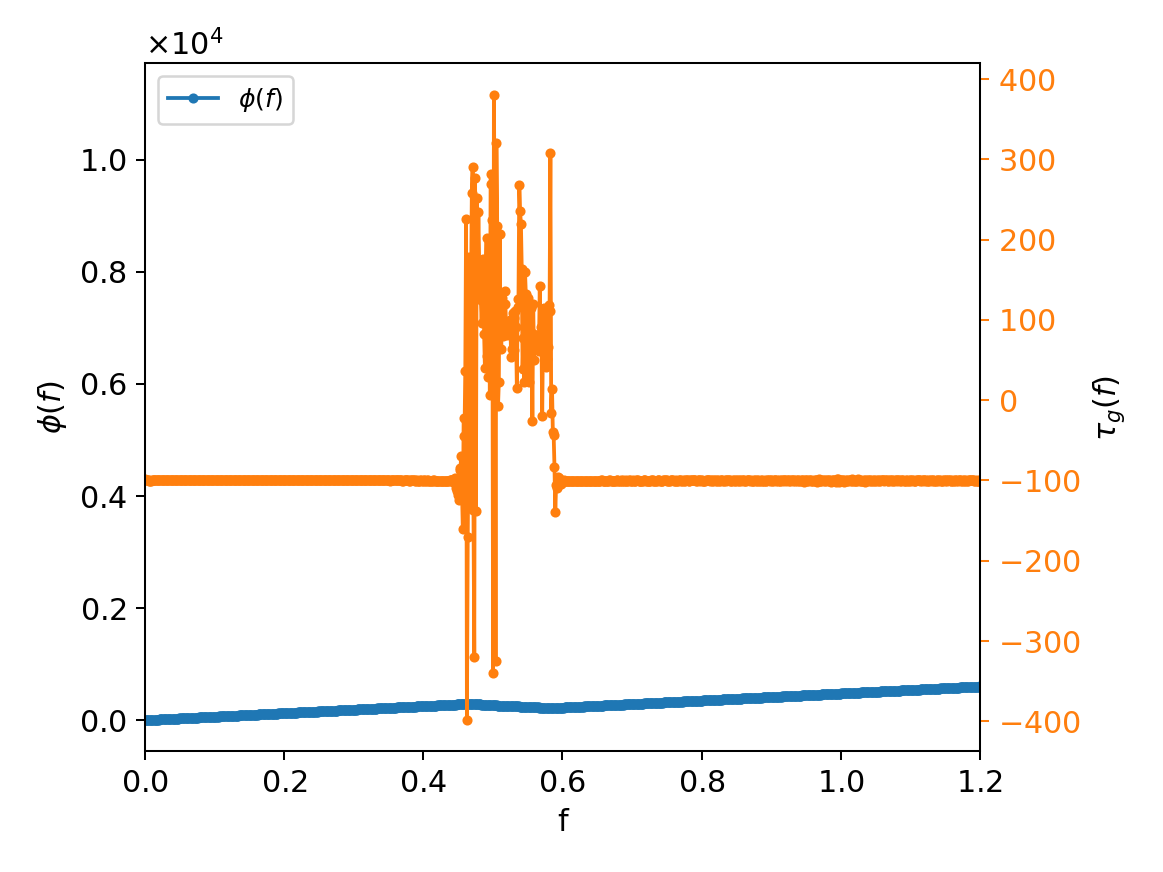

In [7]:
# phase of transfer function
phi=np.angle(H_f)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(f,np.unwrap(phi[0:t_len//2]), marker=".", label="$\phi(f)$" )
# ax.plot(f,phi[0:t_len//2], marker=".", label="$\phi(f)$" )

ax.set_ylabel("$\phi(f)$")
ax.set_xlabel("f")

ax2 = ax.twinx()
ax2.plot(
    (f[:-1]+f[1:])/2,
    -np.diff(np.unwrap(phi[0:t_len//2]))/np.diff(f)*1/(2*np.pi),
    marker=".", color="C1", label=r"$\tau_g$"
)
ax2.set_ylabel(r"$\tau_g(f)$")
ax2.tick_params('y', colors='C1')

ax.set_xlim((0,1.2))
ax.legend(loc="upper left")
# ax2.legend(loc="upper right")
fig.tight_layout()

####  cutting of the output signal

<IPython.core.display.Javascript object>


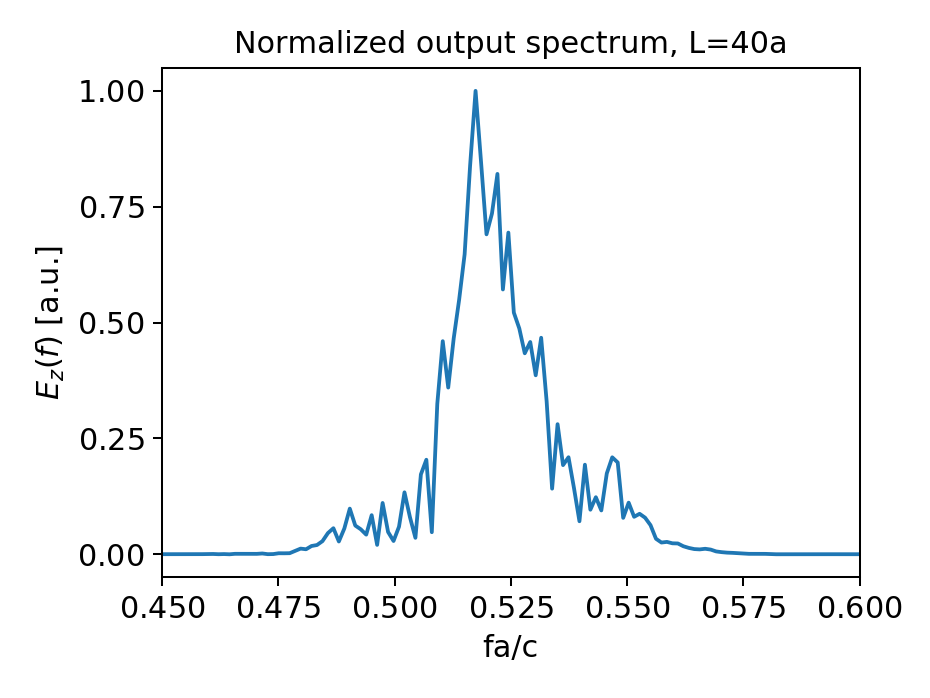

In [9]:
sampling_factor=1
cutoff_time = 266
cutoff_time = 850
cutoff_ind= int(cutoff_time/dt)
N=int(t_len*sampling_factor)
output_f_comp=fft(output_field.get("ez")[:cutoff_ind], n=N)
f=np.linspace(0, 1/(2*dt), N//2)

f_comp_max= np.max( np.abs(output_f_comp))

fig, ax= plt.subplots(figsize=plt.figaspect(0.75)*0.8)
# ax.plot(f,2/cutoff_ind* 10*np.abs(output_f_comp[:N//2]), marker=".", label="output*10" )
ax.plot(f,np.abs(output_f_comp[:N//2])/f_comp_max , label="output" )
ax.set_xlim((0.45,0.6))
ax.set_xlabel("fa/c")
ax.set_ylabel("$E_z(f)$ [a.u.]")
ax.locator_params(axis="y", nbins=5)
# ax.legend()
# ax.set_xlim((0.3,0.8))
ax.set_title("Normalized output spectrum, L=40a")
fig.tight_layout()

# Longer structure 

In [10]:
input_field=h5py.File("/gpfs/data/kellermeier_m/MEEP/transmitted-field-at-point-large-src/transmitted-field--r-0.38-cells-8-l-60-f-0.52-df-0.1-res-18/ez-source.h5")
output_field=h5py.File("/gpfs/data/kellermeier_m/MEEP/transmitted-field-at-point-large-src/transmitted-field--r-0.38-cells-8-l-60-f-0.52-df-0.1-res-18/ez-at-exit-on-axis.h5")
res=18
dt=1/(2*res)
t_len=output_field.get("ez").shape[0]
# frequency domain
input_f_comp=fft(input_field.get("ez")[:t_len],n=t_len)
output_f_comp=fft(output_field.get("ez")[:t_len], n=t_len)
f=np.linspace(0, 1/(2*dt), t_len//2)
# transfer function
H_f=output_f_comp/input_f_comp

<IPython.core.display.Javascript object>


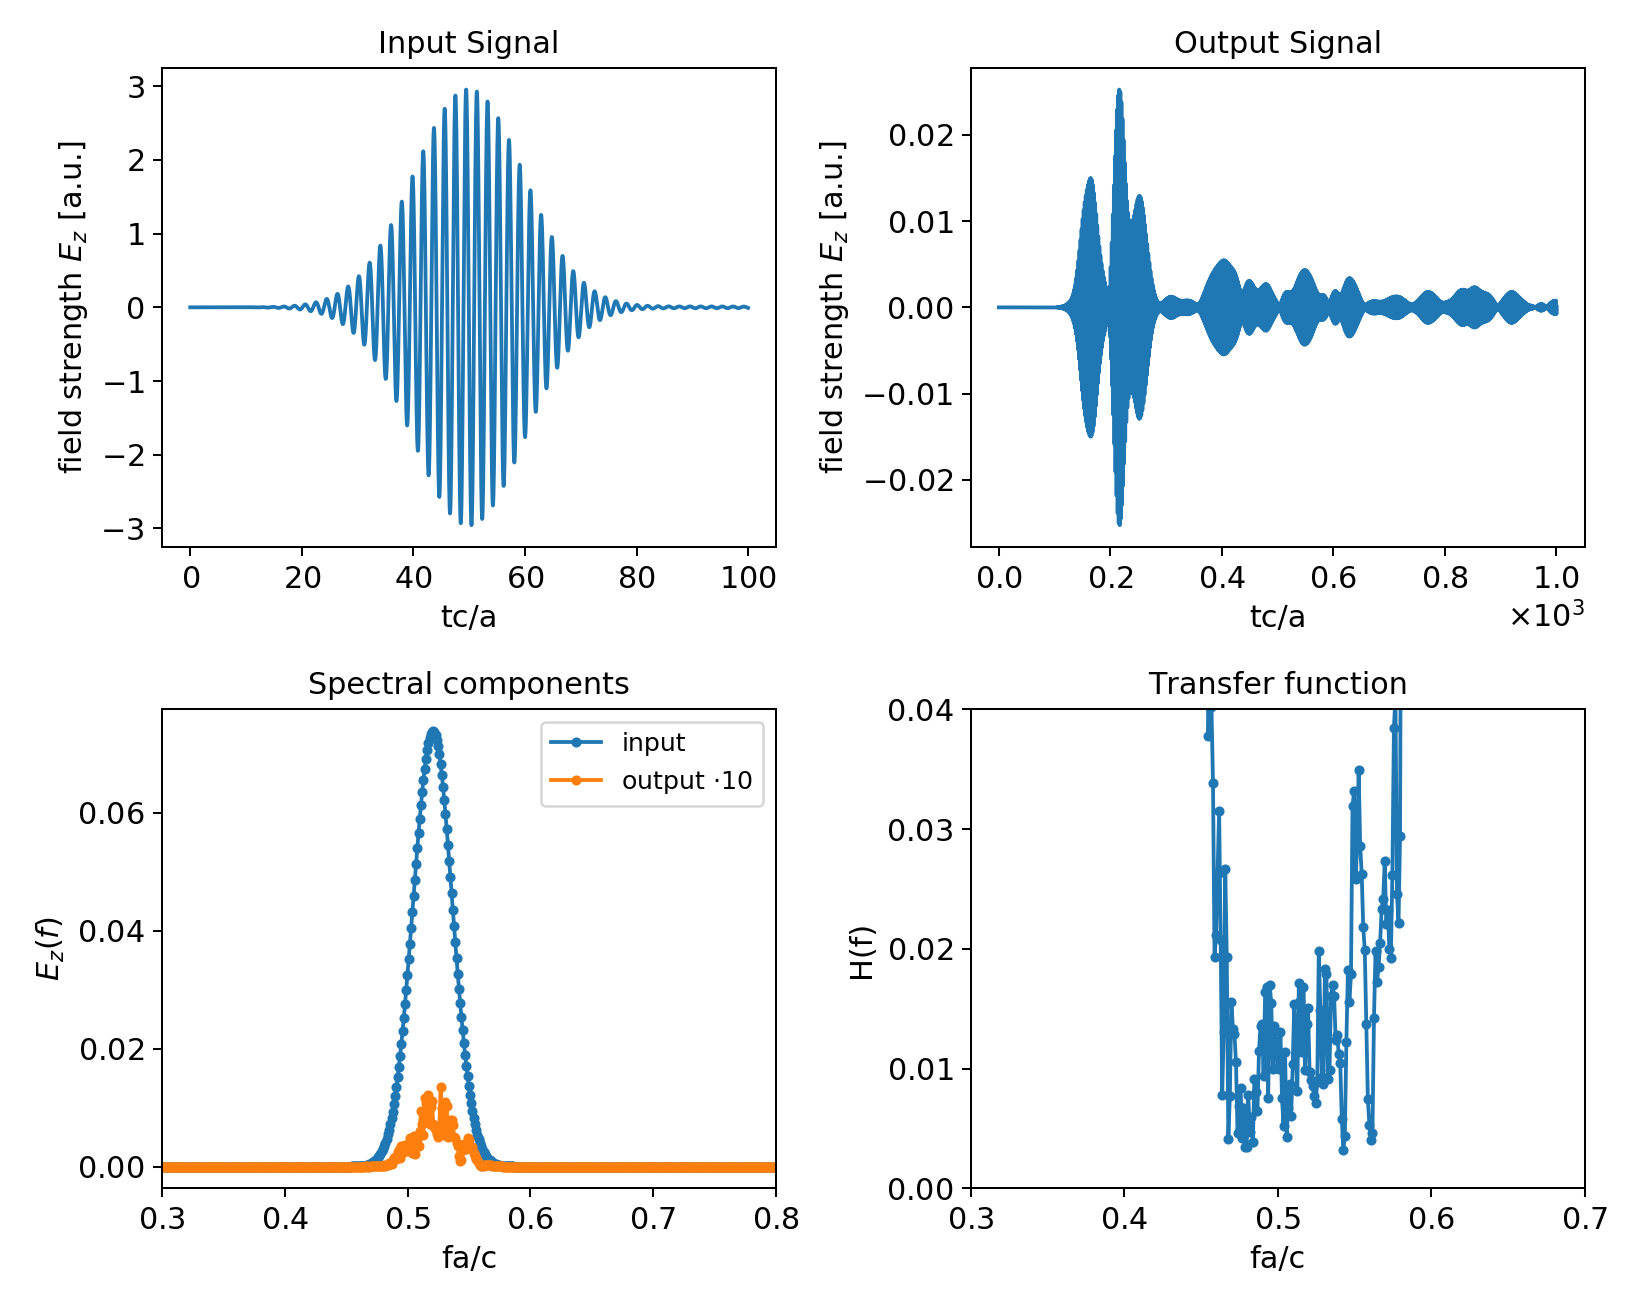

In [11]:
fig=plt.figure(figsize=plt.figaspect(0.8)*1.5)
ax=fig.add_subplot(221)
ax.set_xlabel("tc/a")
ax.set_ylabel("field strength $E_z$ [a.u.]")

t_data= np.arange(0, t_len)*dt
ax.plot(t_data[:input_field.get("ez").shape[0] ], input_field.get("ez"))
# ax.plot(t_data, input_field[:t_len])

ax.set_title("Input Signal")

ax2=fig.add_subplot(222)
ax2.set_xlabel("tc/a")
ax2.set_ylabel("field strength $E_z$ [a.u.]")

t_data= np.arange(0, t_len)*dt
ax2.plot(t_data, output_field.get("ez")[:t_len])

ax2.set_title("Output Signal")

# fourier transformed signals
ax3=fig.add_subplot(223)
ax3.plot(f,2/t_len* np.abs(input_f_comp[0:t_len//2]), marker=".", label="input" )
ax3.plot(f,2/t_len* 10*np.abs(output_f_comp[0:t_len//2]), marker=".", label=r"output $\cdot 10$" )
ax3.set_xlabel("fa/c")
ax3.set_ylabel("$E_z(f)$")
ax3.legend()
ax3.set_xlim((0.3,0.8))
ax3.set_title("Spectral components")

# transfer function
ax4=fig.add_subplot(224)
ax4.plot(f,np.abs(H_f[0:t_len//2]), marker=".")
ax4.set_xlabel("fa/c")
ax4.set_ylabel("H(f)")
ax4.set_xlim((0.3,0.7))
ax4.set_ylim(0,0.04)
ax4.set_title("Transfer function")

fig.tight_layout()

<IPython.core.display.Javascript object>


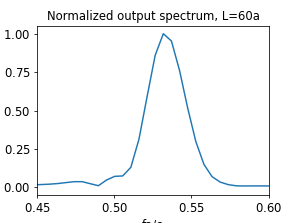

In [165]:
sampling_factor=2
# cutoff_time = 395
cutoff_time=190
# cutoff_time = 980
cutoff_ind= int(cutoff_time/dt)

N=int(cutoff_ind*sampling_factor)
N=cutoff_ind
# from scipy.signal import blackman
# window= blackman(cutoff_ind)

output_f_comp=fft(output_field.get("ez")[:cutoff_ind], n=N)
f=np.linspace(0, 1/(2*dt), N//2)

f_comp_max= np.max( np.abs(output_f_comp))

fig, ax= plt.subplots(figsize=plt.figaspect(0.75)*0.8)
# ax.plot(f,2/cutoff_ind* 10*np.abs(output_f_comp[:N//2]), marker=".", label="output*10" )
ax.plot(f,np.abs(output_f_comp[:N//2])/f_comp_max ,  label="output" )
ax.set_xlim((0.45,0.6))
ax.set_xlabel("fa/c")
ax.set_ylabel("$E_z(f)$ [a.u.]")
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)
# ax.legend()
# ax.set_xlim((0.3,0.8))
ax.set_title("Normalized output spectrum, L=60a")

<IPython.core.display.Javascript object>


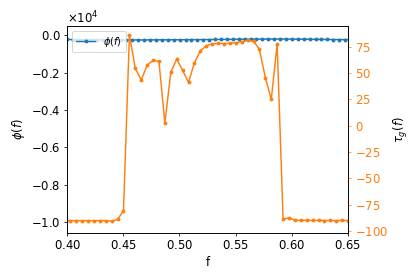

In [168]:
input_f_comp=fft(input_field.get("ez")[:cutoff_ind],n=N)
f=np.linspace(0, 1/(2*dt), N//2)
H_f=output_f_comp/input_f_comp

# phase of transfer function
phi=np.angle(H_f)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(f,np.unwrap(phi[0:N//2]), marker=".", label="$\phi(f)$" )
# ax.plot(f,phi[0:t_len//2], marker=".", label="$\phi(f)$" )

ax.set_ylabel("$\phi(f)$")
ax.set_xlabel("f")

ax2 = ax.twinx()
ax2.plot(
    (f[:-1]+f[1:])/2,
    np.diff(np.unwrap(phi[0:N//2]))/np.diff(f)*1/(2*np.pi),
    marker=".", color="C1", label=r"$\tau_g$"
)
ax2.set_ylabel(r"$\tau_g(f)$")
ax2.tick_params('y', colors='C1')

ax.set_xlim((0.4,0.65))
ax.set_ylim(ymax=500)
ax.legend(loc="upper left")
# ax2.legend(loc="upper right")
fig.tight_layout()

In [129]:
output_field.get("ez").shape

(36020,)

In [28]:
cutoff_time = int(395/dt)
cutoff_time
# t_len

14220

<IPython.core.display.Javascript object>


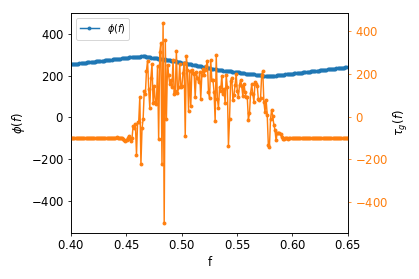

In [159]:
# phase of transfer function
phi=np.angle(H_f)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(f,np.unwrap(phi[0:t_len//2]), marker=".", label="$\phi(f)$" )
# ax.plot(f,phi[0:t_len//2], marker=".", label="$\phi(f)$" )

ax.set_ylabel("$\phi(f)$")
ax.set_xlabel("f")

ax2 = ax.twinx()
ax2.plot(
    (f[:-1]+f[1:])/2,
    -np.diff(np.unwrap(phi[0:t_len//2]))/np.diff(f)*1/(2*np.pi),
    marker=".", color="C1", label=r"$\tau_g$"
)
ax2.set_ylabel(r"$\tau_g(f)$")
ax2.tick_params('y', colors='C1')

ax.set_xlim((0.4,0.65))
ax.set_ylim(ymax=500)
ax.legend(loc="upper left")
# ax2.legend(loc="upper right")
fig.tight_layout()

<IPython.core.display.Javascript object>


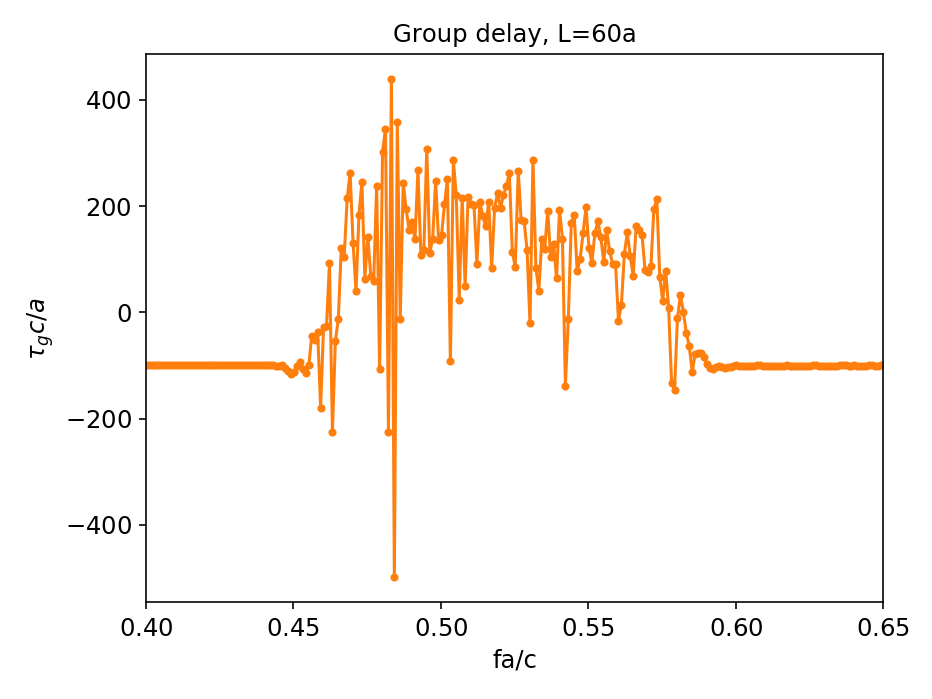

In [65]:
# phase of transfer function
phi=np.angle(H_f)
fig=plt.figure()
ax2=fig.add_subplot(111)
# ax.plot(f,np.unwrap(phi[0:t_len//2]), marker=".", label="$\phi(f)$" )
# ax.plot(f,phi[0:t_len//2], marker=".", label="$\phi(f)$" )

# ax.set_ylabel("$\phi(f)$")
ax2.set_xlabel("fa/c")

# ax2 = ax.twinx()
ax2.plot(
    (f[:-1]+f[1:])/2,
    -np.diff(np.unwrap(phi[0:t_len//2]))/np.diff(f)*1/(2*np.pi),
    marker=".", color="C1", label=r"$\tau_g$"
)
ax2.set_ylabel(r"$\tau_g c/a$")
# ax2.tick_params('y', colors='C1')
ax2.set_xlim((0.4,0.65))
# ax2.legend(loc="upper right")
ax2.set_title("Group delay, L=60a")
fig.tight_layout()

In [114]:
%matplotlib notebook

# Infinitely long structure, no mountings

In [70]:
input_field=h5py.File("/gpfs/data/kellermeier_m/MEEP/transmitted-field-at-point-inf-struct/transmitted-field--pml-8-r-0.38-cells-8-l-60-f-0.52-df-0.1-res-18/ez-source.h5")
output_field=h5py.File("/gpfs/data/kellermeier_m/MEEP/transmitted-field-at-point-inf-struct/transmitted-field--pml-8-r-0.38-cells-8-l-60-f-0.52-df-0.1-res-18/ez-at-exit-on-axis.h5")
res=18
dt=1/(2*res)
t_len=output_field.get("ez").shape[0]
# frequency domain
input_f_comp=fft(input_field.get("ez")[:t_len],n=t_len)
output_f_comp=fft(output_field.get("ez")[:t_len], n=t_len)
f=np.linspace(0, 1/(2*dt), t_len//2)
# transfer function
H_f=output_f_comp/input_f_comp

<IPython.core.display.Javascript object>


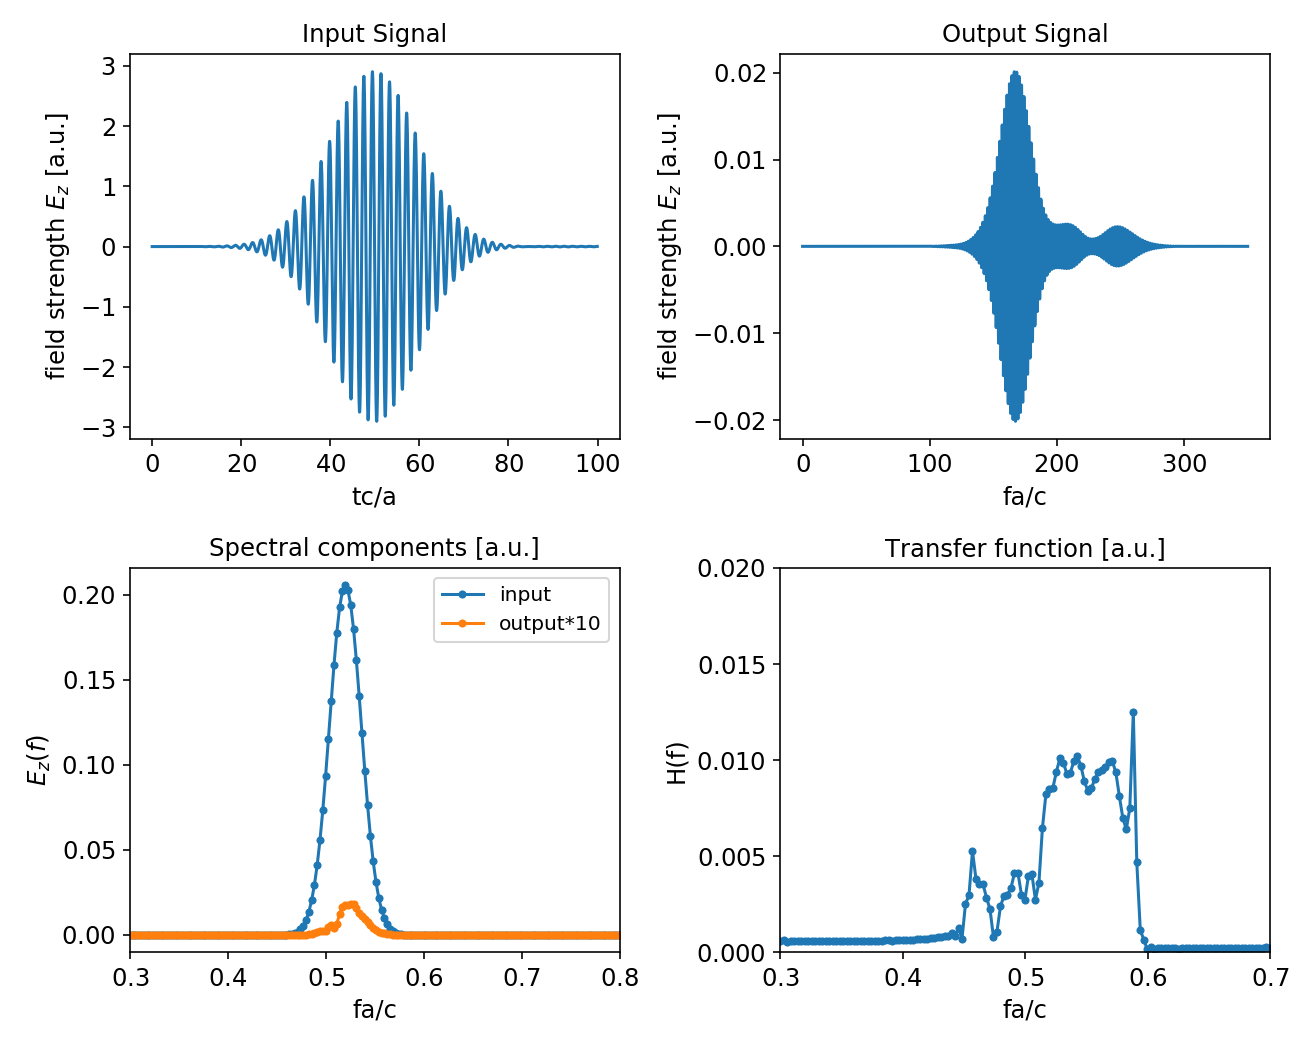

In [71]:
fig=plt.figure(figsize=plt.figaspect(0.8)*1.5)
ax=fig.add_subplot(221)
ax.set_xlabel("tc/a")
ax.set_ylabel("field strength $E_z$ [a.u.]")

t_data= np.arange(0, t_len)*dt
ax.plot(t_data[:input_field.get("ez").shape[0] ], input_field.get("ez"))
# ax.plot(t_data, input_field[:t_len])

ax.set_title("Input Signal")

ax2=fig.add_subplot(222)
ax2.set_xlabel("tc/a")
ax2.set_ylabel("field strength $E_z$ [a.u.]")

t_data= np.arange(0, t_len)*dt
ax2.plot(t_data, output_field.get("ez")[:t_len])

ax2.set_title("Output Signal")

# fourier transformed signals
ax3=fig.add_subplot(223)
ax3.plot(f,2/t_len* np.abs(input_f_comp[0:t_len//2]), marker=".", label="input" )
ax3.plot(f,2/t_len* 10*np.abs(output_f_comp[0:t_len//2]), marker=".", label="output*10" )
ax3.set_xlabel("fa/c")
ax3.set_ylabel("$E_z(f)$")
ax3.legend()
ax3.set_xlim((0.3,0.8))
ax3.set_title("Spectral components [a.u.]")

# transfer function
ax4=fig.add_subplot(224)
ax4.plot(f,np.abs(H_f[0:t_len//2]), marker=".")
ax4.set_xlabel("fa/c")
ax4.set_ylabel("H(f)")
ax4.set_xlim((0.3,0.7))
ax4.set_ylim(0,0.02)
ax4.set_title("Transfer function [a.u.]")
ax4.locator_params(axis="y", nbin=4)

fig.tight_layout()

In [50]:
for ax in fig.axes:
    ax.locator_params(axis="y", nbins=4)
    
ax4.locator_params(axis="y", nbins=4)

<IPython.core.display.Javascript object>


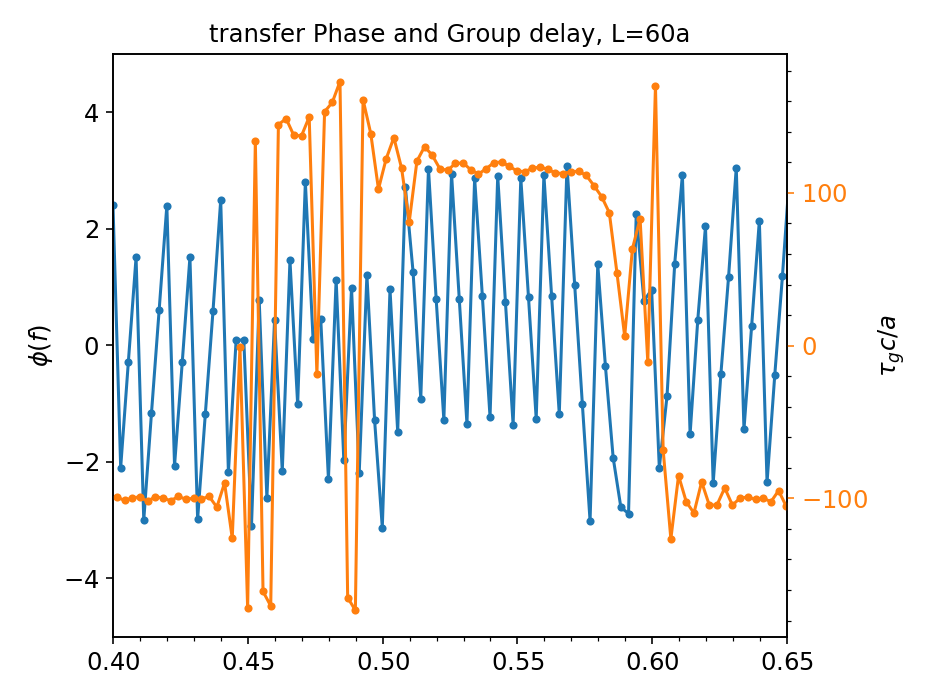

In [78]:
# phase of transfer function
phi=np.angle(H_f)
fig=plt.figure()
ax=fig.add_subplot(111)
# ax.plot(f,np.unwrap(phi[0:t_len//2]), marker=".", label="$\phi(f)$" )
ax.plot(f,phi[0:t_len//2], marker=".", label="$\phi(f)$" )

ax.set_ylabel("$\phi(f)$")
ax2.set_xlabel("fa/c")

diff_f=(f[:-1]+f[1:])/2
tau_g=-np.diff(np.unwrap(phi[0:t_len//2]))/np.diff(f)*1/(2*np.pi)
ax2 = ax.twinx()
ax2.plot(
    diff_f,
    tau_g,
    marker=".", color="C1", label=r"$\tau_g$"
)
ax2.set_ylabel(r"$\tau_g c/a$")

ax.set_ylim((-5,5))
ax2.tick_params('y', colors='C1')
ax2.set_xlim((0.4,0.65))
# ax2.legend(loc="upper right")
ax2.set_title("transfer Phase and Group delay, L=60a")
fig.tight_layout()

ax.locator_params(nbins=5)
ax2.locator_params(nbins=7)
ax2.minorticks_on()
